In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import pandas_profiling
from pandas_profiling import ProfileReport

In [25]:
file = '/Users/tshields/Documents/GitHub/Churn/churn_data_cleaned.csv'

In [26]:
df = pd.read_csv(file, index_col=0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Correlation Between Variables

Exception ignored in: <function tqdm.__del__ at 0x7f964374e8b0>
Traceback (most recent call last):
  File "/Users/tshields/opt/anaconda3/envs/Springboard/lib/python3.8/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tshields/opt/anaconda3/envs/Springboard/lib/python3.8/site-packages/tqdm/notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Text(0.5, 1.0, 'Multi-Collinearity of Features')

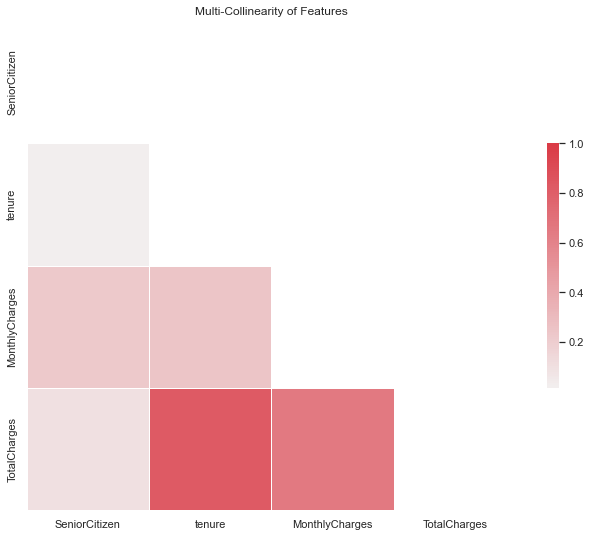

In [27]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

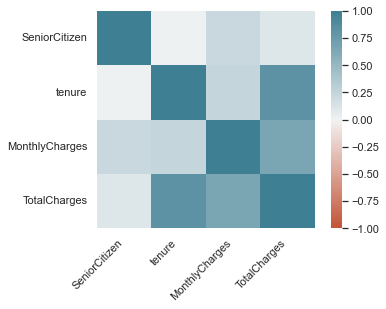

In [29]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

array([[<AxesSubplot:xlabel='SeniorCitizen', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='tenure', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='SeniorCitizen'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='SeniorCitizen'>],
       [<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>,
        <AxesSubplot:xlabel='tenure', ylabel='tenure'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>],
       [<AxesSubplot:xlabel='SeniorCitizen', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>],
       [<AxesSubplot:xlabel='SeniorCitizen', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>,
 

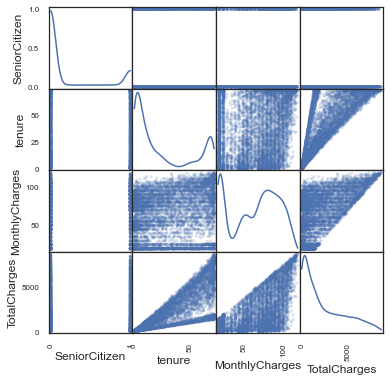

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)